# Example 1: A sparsely connected recurrent network


Next we discuss a model of activity dynamics in a local cortical network proposed by <cite data-cite="Brunel00">Brunel (2000)</cite>. We only describe those parts of the model which are necessary to understand its NEST implementation. Please refer to the original paper for further details.

The local cortical network consists of two neuron populations: a population of $N_E$ excitatory neurons and a population of $N_I$ inhibitory neurons. To mimic the cortical ratio of 80% excitatory neurons and 20% inhibitory neurons, we assume that $N_E=$ 800 and $N_I=$ 200. Thus, our local network has a total of 1000 neurons.

For both the excitatory and the inhibitory population, we use the same integrate-and-fire neuron model with current-based synapses. Incoming excitatory and inhibitory spikes displace the membrane potential $V_m$ by $J_{E}$ and $J_I$, respectively. If $V_m$ reaches the threshold value $V_{\text{th}}$, the membrane potential is reset to $V_{\text{reset}}$, a spike is sent with delay $D=$ 1.5 ms to all post-synaptic neurons, and the neuron remains refractory for $\tau_{\text{rp}}=$ 2.0 ms.

The neurons are mutually connected with a probability of 10%. Specifically, each neuron receives input from $C_{E}= 0.1 \cdot N_{E}$ excitatory and $C_I=0.1\cdot N_{I}$ inhibitory neurons (see figure below). The inhibitory synaptic weights $J_I$ are chosen with respect to the excitatory synaptic weights $J_E$ such that  $J_I = -g \cdot J_E$, with $g=$ 5.0 in this example.

<table class="image">
<caption align="bottom">Sketch of the network model proposed by <cite data-cite="Brunel00">Brunel (2000)</cite>. The network consists of three populations: $N_E$ excitatory neurons (circle labelled E), $N_I$ inhibitory neurons (circle labelled I), and a population of identical, independent Poisson processes (PGs) representing activity from outside the network. Arrows represent connections between the network nodes. Triangular arrow-heads represent excitatory and round arrow-heads represent inhibitory connections. The numbers at the start and end of each arrow indicate the multiplicity of the connection.</caption>
<tr><td><img src="figures/brunel_detailed_external_single2.jpg" alt="Brunel detailed network"/></td></tr>
</table>

In addition to the sparse recurrent inputs from within the local network, each neuron receives randomly timed excitatory input, mimicking  the input from the rest of cortex. The random input is modelled as $C_E$ independent and identically distributed Poisson processes with rate $\nu_{\text{ext}}$, or equivalently, by a single Poisson process with rate  $C_E \cdot \nu_{\text{ext}}$. Here, we set $\nu_{\text{ext}}$ to twice the  rate $\nu_{\text{th}}$ that is needed to drive a neuron to threshold  asymptotically. The details of the model are summarized in the tables below.

In the resulting plot you should see a raster plot of 50 excitatory neurons during the first 300 ms of simulated time. Time is shown along the x-axis, neuron ID along the y-axis. At $t=0$, all neurons are in the same state $V_m=0$ and hence there is no spiking activity. The external stimulus rapidly drives the membrane potentials
towards the threshold. Due to the random nature of the external stimulus, not all the neurons reach the threshold at the same time. After a few milliseconds, the neurons start to spike irregularly at roughly 40 spikes/s. In the original paper, this network state is called the *asynchronous irregular state* <cite data-cite="Brunel00">(Brunel, 2000)</cite>.


### Summary of the network model
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-header{vertical-align:top}
.tg .tg-yw4l{vertical-align:top}

</style>
<table class="tg" width=90%>
  <tr>
    <th class="tg-header" style="font-weight:bold;background-color:#000000;color:#ffffff;" colspan="2">A: Model Summary<br></th>
  </tr>
  <tr>
    <td class="tg-yw4l">Populations</td>
    <td class="tg-yw4l">Three: excitatory, inhibitory, external input</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Topology</td>
    <td class="tg-yw4l">—</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Connectivity</td>
    <td class="tg-yw4l">Random convergent connections with probability $P=0.1$ and fixed in-degree of $C_E=P N_E$ and $C_I=P N_I$.</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Neuron model</td>
    <td class="tg-yw4l">Leaky integrate-and-fire, fixed voltage threshold, fixed absolute refractory time (voltage clamp).</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Channel models</td>
    <td class="tg-yw4l">—</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Synapse model</td>
    <td class="tg-yw4l">$\delta$-current inputs (discontinuous,voltage jumps)</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Plasticity</td>
    <td class="tg-yw4l">—</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Input</td>
    <td class="tg-yw4l">Independent fixed-rate Poisson spike trains to all neurons</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Measurements</td>
    <td class="tg-yw4l">Spike activity</td>
  </tr>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-iuc6{font-weight:bold}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg" width=90%>
  <tr>
    <th class="tg" style="font-weight:bold;background-color:#000000;color:#ffffff;" colspan="3">B: Populations<br></th>
  </tr>
  <tr>
    <td class="tg-iuc6">**Name**</td>
    <td class="tg-iuc6">**Elements**</td>
    <td class="tg-iuc6">**Size**</td>
  </tr>
  <tr>
    <td class="tg-031e">nodes_E</td>
    <td class="tg-031e">`iaf_psc_delta` neuron<br></td>
    <td class="tg-yw4l">$N_{\text{E}} = 4N_{\text{I}}$</td>
  </tr>
  <tr>
    <td class="tg-031e">nodes_I</td>
    <td class="tg-031e">`iaf_psc_delta` neuron<br></td>
    <td class="tg-yw4l">$N_{\text{I}}$</td>
  </tr>
  <tr>
    <td class="tg-yw4l">noise</td>
    <td class="tg-yw4l">Poisson generator<br></td>
    <td class="tg-yw4l">1</td>
  </tr>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-e3zv{font-weight:bold}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-9hbo{font-weight:bold;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg" width=90%>
  <tr>
    <th class="tg" style="font-weight:bold;background-color:#000000;color:#ffffff;" colspan="4" >C: Connectivity<br></th>
  </tr>
  <tr>
    <td class="tg-e3zv">**Name**</td>
    <td class="tg-e3zv">**Source**</td>
    <td class="tg-9hbo">**Target**</td>
    <td class="tg-9hbo">**Pattern**</td>
  </tr>
  <tr>
    <td class="tg-031e">EE</td>
    <td class="tg-031e">nodes_E<br></td>
    <td class="tg-yw4l">nodes_E<br></td>
    <td class="tg-yw4l">Random convergent $C_{\text{E}}\rightarrow 1$, weight $J$, delay $D$</td>
  </tr>
  <tr>
    <td class="tg-031e">IE<br></td>
    <td class="tg-031e">nodes_E<br></td>
    <td class="tg-yw4l">nodes_I<br></td>
    <td class="tg-yw4l">Random convergent $C_{\text{E}}\rightarrow 1$, weight $J$, delay $D$</td>
  </tr>
  <tr>
    <td class="tg-yw4l">EI</td>
    <td class="tg-yw4l">nodes_I</td>
    <td class="tg-yw4l">nodes_E</td>
    <td class="tg-yw4l">Random convergent $C_{\text{I}}\rightarrow 1$, weight $-gJ$, delay $D$</td>
  </tr>
  <tr>
    <td class="tg-yw4l">II</td>
    <td class="tg-yw4l">nodes_I</td>
    <td class="tg-yw4l">nodes_I</td>
    <td class="tg-yw4l">Random convergent $C_{\text{I}}\rightarrow 1$, weight $-gJ$, delay $D$</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Ext</td>
    <td class="tg-yw4l">noise</td>
    <td class="tg-yw4l">nodes_E $\cup$ nodes_I</td>
    <td class="tg-yw4l">Divergent $1 \rightarrow N_{\text{E}} + N_{\text{I}}$, weight $J$, delay $D$</td>
  </tr>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-e3zv{font-weight:bold}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg" width=90%>
  <tr>
    <th class="tg" style="font-weight:bold;background-color:#000000;color:#ffffff;" colspan="2">D: Neuron and Synapse Model<br></th>
  </tr>
  <tr>
    <td class="tg-031e">**Name**</td>
    <td class="tg-031e">`iaf_psc_delta` neuron<br></td>
  </tr>
  <tr>
    <td class="tg-031e">**Type**<br></td>
    <td class="tg-031e">Leaky integrate- and-fire, $\delta$-current input</td>
  </tr>
  <tr>
    <td class="tg-031e">**Sub-threshold dynamics**<br></td>
    <td class="tg-031e">\begin{equation*}
      \begin{array}{rll}
      \tau_m \dot{V}_m(t) = & -V_m(t) + R_m I(t) &\text{if not refractory}\; (t > t^*+\tau_{\text{rp}}) \\[1ex]
      V_m(t) = & V_{\text{r}} & \text{while refractory}\; (t^*<t\leq t^*+\tau_{\text{rp}}) \\[2ex]
      I(t) = & {\frac{\tau_m}{R_m} \sum_{\tilde{t}} w
        \delta(t-(\tilde{t}+D))}
      \end{array}
    \end{equation*}<br></td>
  </tr>
  <tr>
    <td class="tg-yw4l">**Spiking**<br></td>
    <td class="tg-yw4l">If $V_m(t-)<V_{\theta} \wedge V_m(t+)\geq V_{\theta}$<br>&emsp;1. set $t^* = t$<br>&emsp;2. emit spike with time-stamp $t^*$<br></td>
  </tr>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-e3zv{font-weight:bold}
.tg .tg-hgcj{font-weight:bold;text-align:center}
</style>
<table class="tg" width=90%>
  <tr>
    <th class="tg" style="font-weight:bold;background-color:#000000;color:#ffffff;" colspan="2">E: Input<br></th>
  </tr>
  <tr>
    <td class="tg-031e">**Type**<br></td>
    <td class="tg-031e">**Description**<br></td>
  </tr>
  <tr>
    <td class="tg-031e">Poisson generator<br></td>
    <td class="tg-031e">Fixed rate $\nu_{\text{ext}} \cdot C_{\text{E}}$, one generator providing independent input to each target neuron</td>
  </tr>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-e3zv{font-weight:bold}
.tg .tg-hgcj{font-weight:bold;text-align:center}
</style>
<table class="tg" width=90%>
  <tr>
    <th class="tg" style="font-weight:bold;background-color:#000000;color:#ffffff;" colspan="2">F: Measurements<br></th>
  </tr>
  <tr>
    <td class="tg-031e" colspan="2">Spike activity as raster plots, rates and ''global frequencies'', no details given</td>
  </tr>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-yw4l{vertical-align:top;}
</style>
<table class="tg" width=90%>
  <tr>
    <th class="tg" style="font-weight:bold;background-color:#000000;color:#ffffff;" colspan="2">G: Network Parameters<br></th>
  </tr>
  <tr>
    <td class="tg-yw4l" style="border-right-style:hidden">**Parameter**</td>
    <td class="tg-yw4l" style="text-align:right;">**Value**<br></td>
  </tr>
  <tr>
    <td class="tg-yw4l" style="border-right-style:hidden">Number of excitatory neurons $N_E$</td>
    <td class="tg-yw4l" style="text-align:right;">8000</td>
  </tr>
  <tr>
    <td class="tg-yw4l" style="border-right-style:hidden;border-top-style:hidden">Number of inhibitory neurons $N_I$</td>
    <td class="tg-yw4l" style="text-align:right;border-top-style:hidden;">2000</td>
  </tr>
  <tr>
    <td class="tg-yw4l" style="border-right-style:hidden;border-top-style:hidden">Excitatory synapses per neuron $C_E$</td>
    <td class="tg-yw4l" style="text-align:right;border-top-style:hidden;">800</td>
  </tr>
  <tr>
    <td class="tg-yw4l" style="border-right-style:hidden;border-top-style:hidden">Inhibitory synapses per neuron $C_I$</td>
    <td class="tg-yw4l" style="text-align:right;border-top-style:hidden;">200</td>
  </tr>
  <tr>
  </tr>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-e3zv{font-weight:bold}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg" width=90%>
  <tr>
    <th class="tg" style="font-weight:bold;background-color:#000000;color:#ffffff;" colspan="2">H: Neuron Parameters<br></th>
  </tr>
  <tr>
    <td class="tg-031e" style="border-right-style:hidden">**Parameter**</td>
    <td class="tg-031e" style="text-align:right;">**Value**<br></td>
  </tr>
  <tr>
    <td class="tg-yw4l" style="border-right-style:hidden">Membrane time constant $\tau_m$</td>
    <td class="tg-yw4l" style="text-align:right;">20 ms</td>
  </tr>
  <tr>
    <td class="tg-yw4l"style="border-right-style:hidden;border-top-style:hidden">Refractory period $\tau_{\text{rp}}$</td>
    <td class="tg-yw4l" style="text-align:right;border-top-style:hidden;">2 ms</td>
  </tr>
  <tr>
    <td class="tg-yw4l"style="border-right-style:hidden;border-top-style:hidden">Firing threshold $V_{\text{th}}$</td>
    <td class="tg-yw4l" style="text-align:right;border-top-style:hidden;">20 mV</td>
  </tr>
  <tr>
    <td class="tg-yw4l"style="border-right-style:hidden;border-top-style:hidden">Membrane capacitance $C_m$</td>
    <td class="tg-yw4l" style="text-align:right;border-top-style:hidden;">1 pF</td>
  </tr>
  <tr>
    <td class="tg-yw4l"style="border-right-style:hidden;border-top-style:hidden">Resting potential $V_E$</td>
    <td class="tg-yw4l" style="text-align:right;border-top-style:hidden;">0 mV</td>
  </tr>
  <tr>
    <td class="tg-yw4l"style="border-right-style:hidden;border-top-style:hidden">Reset potential $V_{\text{reset}}$</td>
    <td class="tg-yw4l" style="text-align:right;border-top-style:hidden;">10 mV</td>
  </tr>
  <tr>
    <td class="tg-yw4l"style="border-right-style:hidden;border-top-style:hidden">Excitatory PSP amplitude $J_E$</td>
    <td class="tg-yw4l" style="text-align:right;border-top-style:hidden;">0.1 mV</td>
  </tr>
  <tr>
    <td class="tg-yw4l"style="border-right-style:hidden;border-top-style:hidden">Inhibitory PSP amplitude $J_I$</td>
    <td class="tg-yw4l" style="text-align:right;border-top-style:hidden;">-0.5 mV</td>
  </tr>
  <tr>
    <td class="tg-yw4l"style="border-right-style:hidden;border-top-style:hidden">Synaptic delay $D$</td>
    <td class="tg-yw4l" style="text-align:right;border-top-style:hidden;">1.5 ms</td>
  </tr>
  <tr>
    <td class="tg-yw4l"style="border-right-style:hidden;border-top-style:hidden">Background rate $\eta$</td>
    <td class="tg-yw4l" style="text-align:right;border-top-style:hidden;">2.0</td>
  </tr>
  <tr>
  </tr>
</table>


## NEST Implementation

We now show how this model is implemented in NEST. Along the way, we
explain the required steps and NEST commands in more detail so that
you can apply them to your own models.

### Preparations
The first three lines import NEST, a NEST module for raster plots, and
the plotting package `pylab`. We then assign the various model
parameters to variables.

In [1]:
import nest
import nest.raster_plot
import pylab
nest.ResetKernel()
g = 3.0
eta = 2.0
delay = 1.5
tau_m = 20.0
V_th = 20.0
N_E = 8000
N_I = 2000
N_neurons = N_E + N_I
C_E = int(N_E / 10)
C_I = int(N_I / 10)
J_E = 0.1
J_I = -g * J_E
nu_ex = eta * V_th / (J_E * C_E * tau_m)
p_rate = 1000.0 * nu_ex * C_E

In the second to last line, we compute the firing rate
`nu_ex` ($\nu_{\text{ext}}$) of a neuron in the external population. We define
`nu_ex` as the product of a constant `eta` times
the threshold rate $\nu_{\text{th}}$, i.e. the steady state firing
rate which is needed to bring a neuron to threshold. The value of the
scaling constant is defined with `eta`.

In the final line, we compute the combined input rate due to the
external population. With $C_E$ incoming synapses per neuron, the total rate is
simply the product `nu_ex*C_E`. The factor 1000.0 in the
product changes the units from spikes per ms to spikes per second.

Next, we prepare the simulation kernel of NEST

In [2]:
nest.SetKernelStatus({'print_time': True})

The command `SetKernelStatus`
modifies parameters of the simulation kernel. The argument is a Python
dictionary with *key*:*value* pairs. Here, we set the NEST
kernel to print the progress of the simulation time during simulation. Note that the progress is output only to the terminal.

### Creating neurons and devices

As a rule of thumb, we recommend that you create all elements in your
network, i.e., neurons, stimulating devices and recording devices
first, before creating any connections. 

In [3]:
nest.SetDefaults('iaf_psc_delta', 
                 {'C_m': 1.0,
                  'tau_m': tau_m,
                  't_ref': 2.0,
                  'E_L': 0.0,
                  'V_th': V_th,
                  'V_reset': 10.0})

Here we change the parameters of the neuron model we want to use from the
built-in values to the defaults for our investigation.
`SetDefaults` expects two parameters. The first is a string,
naming the model for which the default parameters should be
changed. Our neuron model for this simulation is the simplest
integrate-and-fire model in NEST's repertoire:
`'iaf_psc_delta'`. The second parameter is a dictionary with
parameters and their new values, entries separated by commas. All
parameter values are taken from Brunel's paper <cite data-cite="Brunel00">(Brunel, 2000)</cite> and we
insert them directly for brevity. Only the membrane time constant
`tau_m` and the threshold potential `V_th` are
read from variables, because these values are needed in several places.

In [4]:
nodes = nest.Create('iaf_psc_delta', N_neurons)
nodes_E = nodes[:N_E]
nodes_I = nodes[N_E:]

noise = nest.Create('poisson_generator', 1, {'rate': p_rate})

nest.SetDefaults('spike_detector', {'to_file': True})

spikes = nest.Create('spike_detector', 2,
                     [{'label': 'brunel-py-ex'},
                      {'label': 'brunel-py-in'}])
spikes_E = spikes[:1]
spikes_I = spikes[1:]

As before we create the neurons with `Create`, which returns a list of the global IDs which
are consecutive numbers from 1 to `N_neurons`. 
We split this range into excitatory and inhibitory neurons. We then select the first `N_E`
elements from the list `nodes` and assign them to the
variable `nodes_E`. This list now holds the GIDs of the
excitatory neurons. 

Similarly, in the next line, we assign the range from position
`N_E` to the end of the list to the variable
`nodes_I`. This list now holds the GIDs of all inhibitory
neurons. The selection is carried out using standard Python list commands. You
may want to consult the Python documentation for more details.

Next, we create and connect the external population and some devices
to measure the spiking activity in the network.

We create a device known as a
`poisson_generator`, which produces a spike train governed
by a Poisson process at a given rate. We use the third parameter of
`Create` to initialize the rate of the Poisson process to
the population rate `p_rate` which we have previously computed.

If a Poisson generator is connected to $n$ targets, it generates $n$
independent and identically distributed spike trains. Thus, we only
need one generator to model an entire population of randomly firing
neurons.

To observe how the neurons in the recurrent network respond to the 
random spikes from the external population, we create two spike detectors.
By default, spike detectors record to memory but not to file. We override this default behaviour to also record
to file. Then we create one detector for the 
excitatory neurons and one for the inhibitory neurons. 
The default file names are automatically generated from the device type and
its global ID. We use the third argument of `Create` to give each 
spike detector a `'label'`, which will be part of the name of the 
output file written by the detector. Since two devices are created, we supply
a list of dictionaries.

In the second to last line, we store the GID of the first spike
detector in a one-element list and assign it to the variable
`spikes_E`. In the next line, we do the same for the second
spike detector that is dedicated to the inhibitory population.

### Connecting the network

Once all network elements are in place, we connect them.


In [5]:
nest.CopyModel('static_synapse_hom_w', 
               'excitatory',
               {'weight': J_E, 
                'delay': delay})
nest.Connect(nodes_E, nodes, 
             {'rule': 'fixed_indegree', 
              'indegree': C_E},
             'excitatory')          
nest.CopyModel('static_synapse_hom_w', 
               'inhibitory',
               {'weight': J_I, 
                'delay':delay})
nest.Connect(nodes_I, nodes,
             {'rule': 'fixed_indegree', 
              'indegree': C_I},
             'inhibitory')

We create a new connection
type `'excitatory'` by copying the built-in connection type
`'static_synapse_hom_w'` while changing its default values
for *weight* and *delay*. The command `CopyModel`
expects either two or three arguments: the name of an existing neuron
or synapse model, the name of the new model, and optionally a
dictionary with the new default values of the new model.

The connection type `'static_synapse_hom_w'` uses the same
values of weight for all synapses. This saves memory for
networks in which these values are identical for all connections. Later (in 'Randomness in NEST') we will use a different connection model to
implement randomized weights and delays.

Having created and parameterized an appropriate synapse model, we draw
the incoming excitatory connections for each neuron. The function
`Connect`  expects four arguments: a list of
source nodes, a list of target nodes, a connection rule, and a synapse
specification. Some connection rules, in particular
`'one_to_one'` and `'all_to_all'` require no
parameters and can be specified as strings. All other connection rules
must be specified as a dictionary, which at least must contain the key
`'rule'` specifying a connection rule;
`nest.ConnectionRules()` shows all connection rules. The
remaining dictionary entries depend on the particular rule. We use the
`'fixed_indegree'` rule, which creates exactly
`indegree` connections to each target neuron; in previous
versions of NEST, this connectivity was provided by
`RandomConvergentConnect`. 

The final argument specifies the synapse model to be used, here the
`'excitatory'` model we defined previously.


In the final lines we
repeat the same steps for the inhibitory connections: we create a new
connection type and draw the incoming inhibitory connections for all neurons.

In [6]:
nest.Connect(noise, nodes, syn_spec='excitatory')

N_rec = 50
nest.Connect(nodes_E[:N_rec], spikes_E)
nest.Connect(nodes_I[:N_rec], spikes_I)

Here we use `Connect` to
connect the Poisson generator to all nodes of the local network. Since
these connections are excitatory, we use the `'excitatory'`
connection type. Finally, we connect a subset of excitatory and
inhibitory neurons to the spike detectors to record from them. If no connection rule
is given, `Connect` connects all sources to all targets (`all_to_all` rule), 
i.e., the noise generator is connected to all neurons 
(previously `DivergentConnect`), while in the second to last line, all recorded 
excitatory neurons are connected to the `spikes_E` spike detector 
(previously `ConvergentConnect`).

Our network consists of 10,000 neurons, all of which have the same
activity statistics due to the random connectivity. Thus, it suffices
to record from a representative sample of neurons, rather than from
the entire network. Here, we choose to record from 50 neurons and
assign this number to the variable `N_rec`. We then connect
the first 50 excitatory neurons to their spike detector. Again, we use
standard Python list operations to select `N_rec` neurons
from the list of all excitatory nodes. Alternatively, we could select
50 neurons at random, but since the neuron order has no meaning in
this model, the two approaches would yield qualitatively the same
results. Finally, we repeat this step for the inhibitory neurons.

### Simulating the network

Now everything is set up and we can run the simulation.

Excitatory rate: 231.73 Hz
Inhibitory rate: 232.67 Hz


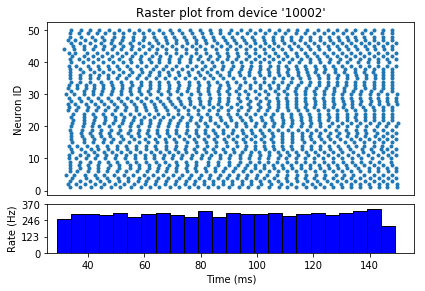

In [7]:
simtime = 150.0
nest.Simulate(simtime)
ex_events, in_events = nest.GetStatus(spikes, 'n_events')
events_to_rate = 1000. / simtime / N_rec
rate_ex = ex_events * events_to_rate
print('Excitatory rate: {:.2f} Hz'.format(rate_ex))
rate_in = in_events * events_to_rate
print('Inhibitory rate: {:.2f} Hz'.format(rate_in))
nest.raster_plot.from_device(spikes_E, hist=True); 